In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

In [14]:
data = pd.read_csv('Advertising.csv', index_col=0)

In [15]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [17]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [18]:
data.duplicated().sum()

0

<Axes: >

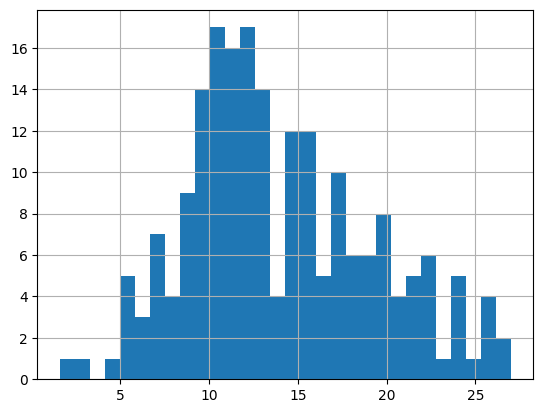

In [19]:
data['Sales'].hist(bins=30)

### Feature Scaling and Train Test Split

In [24]:
X = data.drop(columns='Sales')
y = data['Sales']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=0)

## Baseline Model - Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr_pred_y = lr.predict(X_test)
print("mean_squared_error for Linear Regression: ", mean_squared_error(y_test, lr_pred_y))

mean_squared_error for Linear Regression:  5.35577478243124


## Alternate Model - Random Forest Regressor

In [60]:
rf = RandomForestRegressor(random_state=0, n_estimators=5, max_samples=1.0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_samples=1.0, n_estimators=5, random_state=0)

In [62]:
rf_pred_y = rf.predict(X_test)
print("mean_squared_error for Linear Regression: ", mean_squared_error(y_test, rf_pred_y))

Since the Mean Squared Error is low for random Forest Regressor, Therefore will will select the `Random Forest Regressor`` as champion and final model